# Project 2: Factors Impact No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

The dataset utilized for this report is No-Show Appointment. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.     


From this project, I will investigate what factors impact whether or not patients show up for their appointment (No-show column), and the factors I will analyze are day difference between appointment day and scheduled day, age of the patient, and SMS received. 


In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load Data and convert ScheduledDay and ScheduledDay to datetime dtype
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv", parse_dates=['ScheduledDay','AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#data samples and columns
df.shape

(110527, 14)

In [4]:
#check if there is any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [5]:
#check if there is any duplicates
df.duplicated().sum()

0

### Data Cleaning: Split Date and Time for ScheduledDay and ScheduledDay 

In [6]:
# Split ScheduledDay's Date and Time into two columns
df['Scheduled_Date'] = df['ScheduledDay'].dt.date
df['Scheduled_Time'] = df['ScheduledDay'].dt.time

# Split AppointmentDay's Date and Time into two columns
df['Appointment_Date'] = df['AppointmentDay'].dt.date
df['Appointment_Time'] = df['AppointmentDay'].dt.time

#drop ScheduledDay and AppointmentDay
df.drop(columns = ['ScheduledDay','AppointmentDay'],inplace = True)

In [7]:
#adding a day difference column between ScheduledDay and ScheduledDay
df['day_diff'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days

In [8]:
print("Date range for Scheduled Day is from %s to %s" % (min(df['Scheduled_Date']),max(df['Scheduled_Date'])))
print("Date range for Appointment Day is from %s to %s" % (min(df['Appointment_Date']),max(df['Appointment_Date'])))


Date range for Scheduled Day is from 2015-11-10 to 2016-06-08
Date range for Appointment Day is from 2016-04-29 to 2016-06-08


In [9]:
df.head(2)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,day_diff
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00,0


<a id='eda'></a>
## Exploratory Data Analysis


In [10]:
#Convert categorical variables to numeric using label encoder
le = LabelEncoder()
df['Gender_le'] = le.fit_transform(df['Gender'])

le2 = LabelEncoder()
df['No-show_le'] = le2.fit_transform(df['No-show'])

#### According to the correlation matrix below, it is obvious that day_diff and SMS_received have a higher correlation to no-show results

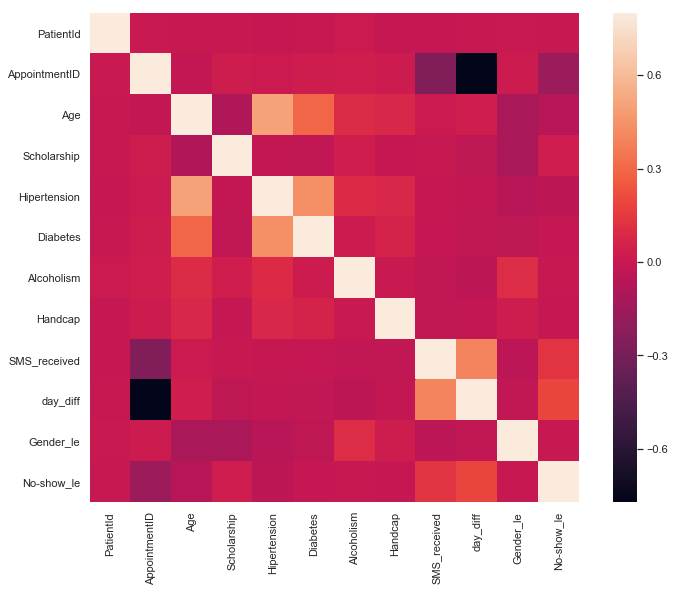

In [11]:
#using seaborn correlation matrix to visualize factors with high correlation
corr_matrix = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'});
sns.set_style("whitegrid");
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

### Research Question 1: Does the longer day gap between Appointment date and Scheduled date would cause patients to not show to their appointments?



In [12]:
#check the average day difference for no show and show group
avg_diff = df.groupby(['No-show']).mean()
avg_diff

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,day_diff,Gender_le,No-show_le
No-show,,,,,,,,,,,,
No,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659,0.351011,0.0
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.831489,0.346118,1.0


In [13]:
avg_diff['day_diff']

No-show
No      8.754659
Yes    15.831489
Name: day_diff, dtype: float64

#### According to the data, patients who show up to their appointments have an average gap of 8.75 days between their scheduled date and appointment date, but patients who don't show up have an average date gap of 15.83 days. Thus, when the date gap is longer between appointment date and scheduled date, it is more likely that the patient will not show up.

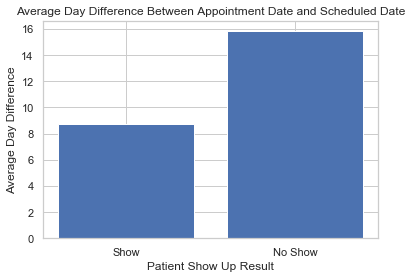

In [14]:
#visualize the findings
plt.bar(x=["Show","No Show"],height=avg_diff['day_diff']);
plt.title("Average Day Difference Between Appointment Date and Scheduled Date");
plt.xlabel("Patient Show Up Result");
plt.ylabel("Average Day Difference");

### Research Question 2: Do SMS sent to patients impact whether patients will show up to their appointments?


SMS_received: 1 or more messages sent to the patient.

In [15]:
print("Minimum of SMS_received is %s and maximum is  %s" % (min(df['SMS_received']),max(df['SMS_received'])))

Minimum of SMS_received is 0 and maximum is  1


In [16]:
df_SMS = df.groupby(['No-show','SMS_received'])['Gender'].count()
df_SMS

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: Gender, dtype: int64

In [17]:
#total based on no show results
df_SMS.sum(axis=0, level='No-show')

No-show
No     88208
Yes    22319
Name: Gender, dtype: int64

In [18]:
#Each counts divided by each No-show total
df_SMS = df_SMS.div(df_SMS.sum(axis=0, level='No-show'),level='No-show')
df_SMS

No-show  SMS_received
No       0               0.708666
         1               0.291334
Yes      0               0.561629
         1               0.438371
Name: Gender, dtype: float64

#### Ironically, for those who show up to their appointment only 30% received SMS, so it might not be the case that sending patient SMS would help them to go to their appointments.  

#### There is a tendency that patients didn't receive any SMS are more likely to go to their appointments. 

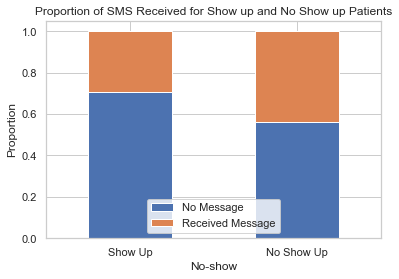

In [19]:
#visualize results
df_SMS.unstack().plot(kind = 'bar',stacked = True);
plt.title("Proportion of SMS Received for Show up and No Show up Patients")
plt.xticks([0,1],["Show Up", "No Show Up"],rotation='horizontal');
plt.ylabel("Proportion");
plt.legend(["No Message","Received Message"],loc='lower center');

### Research Question 3 : Does age impact patients behavior of going to their appointments?

In [20]:
#split population into no show group and show group
df_noshow = df[df['No-show'] == "Yes"]
df_show = df[df['No-show'] == "No"]
total_noshow = len(df_noshow)
total_show = len(df_show)

In [21]:
#count the number of people within each show/no show group
age_noshow = df_noshow.groupby("Age")['day_diff'].count()
age_show = df_show.groupby("Age")['day_diff'].count()

#### I notice that younger patients around 20ish are more likely to not show up to their appointment, but older patients around 50ish are more likely to show up to their appointmets.

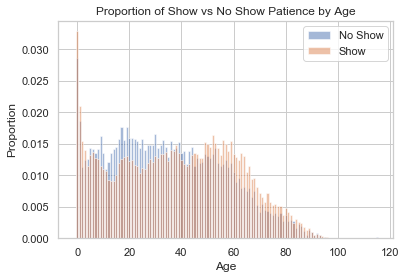

In [22]:
plt.bar(age_noshow.index, age_noshow/total_noshow,alpha = 0.5, label = "No Show");
plt.bar(age_show.index, age_show/total_show,alpha = 0.5, label = "Show");
plt.legend();
plt.title("Proportion of Show vs No Show Patience by Age");
plt.xlabel("Age");
plt.ylabel("Proportion");

### Further Investigations

,PatientId
Gender,
F,71840
M,38687


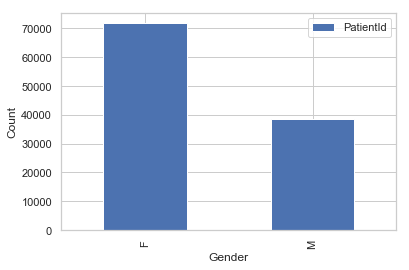

In [29]:
#gender distribution
df.groupby(['Gender'])[['PatientId']].count().plot(kind='bar').set_ylabel("Count");
df.groupby(['Gender'])[['PatientId']].count()

,mean,std
Gender,,
F,38.893987,22.155235
M,33.736863,24.435221


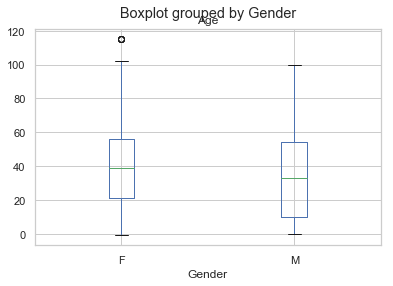

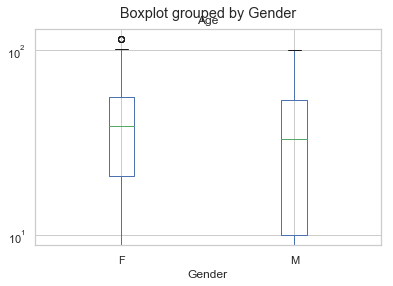

In [42]:
#.loc[:,['mean','std']]
df.boxplot(column = 'Age', by = 'Gender');
df.boxplot(column = 'Age', by = 'Gender').set_yscale('log');
pd.DataFrame(df.groupby(['Gender'])['Age'].describe().loc[:,['mean','std']])

In [74]:
df.groupby(['Gender'])['Age'].describe().loc[:,['mean','std']]

,mean,std
Gender,,
F,38.893987,22.155235
M,33.736863,24.435221


In [76]:
df.groupby(['Gender'])[['Age']].describe().loc[:,(slice(None),['mean','std'])]

Age           
             mean        std
Gender                      
F       38.893987  22.155235
M       33.736863  24.435221

In [68]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,day_diff,Gender_le,No-show_le
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00,0,1,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,00:00:00,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29,00:00:00,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29,00:00:00,0,0,0


In [69]:
df['No-show']= pd.get_dummies(df['No-show'])

In [70]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,day_diff,Gender_le,No-show_le
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08,2016-04-29,00:00:00,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27,2016-04-29,00:00:00,0,1,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04,2016-04-29,00:00:00,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31,2016-04-29,00:00:00,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23,2016-04-29,00:00:00,0,0,0


In [83]:
df.groupby(['Gender','Alcoholism'])[['No-show']].mean()

No-show
Gender Alcoholism          
F      0           0.797697
       1           0.748160
M      0           0.798741
       1           0.827328

In [84]:
df.groupby(['Gender','Alcoholism'])[['No-show']].mean().unstack()

No-show          
Alcoholism         0         1
Gender                        
F           0.797697  0.748160
M           0.798741  0.827328

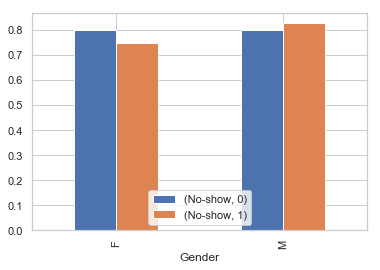

In [89]:
df.groupby(['Gender','Alcoholism'])[['No-show']].mean().unstack().plot(kind='bar');
plt.legend(loc= 'lower center');

<a id='conclusions'></a>
## Conclusions

According to my investigation, the date difference between appointment date and scheduled date, SMS received, and age are correlated with patients show/no show results. 

- The longer date gap between appointment date and schedule date, it is more likely that patients won't show up.   
- For patients who show up to their appointents, only a small proportion receives a SMS message.    
- For younger patients, there is a higher chance they will not show up to their appointments, and for older patients, they are more likely to show up compared to younger patience. 
